In [2]:
#Group 37
#ECE-657A

#libraries
import matplotlib.pyplot as plt           # graphs, figures and plots
import matplotlib
import plotly.plotly as py                # interactive, publication-quality graphs online
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns                     # high-level interface for drawing attractive and informative statistical graphics
import numpy as np                        # package for scientific computing
import pandas as pd                       # high-performance, easy-to-use data structures and data analysis tools
import numpy as np                        # high-performance, easy-to-use data structures and data analysis tools           
import random as rnd                      # generate pseudo-random numbers
import re                                 # regular expression
import io                                 # Python interfaces to stream handling
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler    # for mormalization
from numpy import genfromtxt                        # reading 
from scipy.stats import multivariate_normal         # statistical functions
from sklearn.metrics import f1_score                #performance metrics
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
import string
import nltk                               # libraries and programs for symbolic and statistical natural language processing for English
from nltk.corpus import stopwords         # stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
from nltk.tokenize import word_tokenize   # divides a string into substrings
from wordcloud import WordCloud, STOPWORDS   #representing text data in which the size of each word indicates its frequency or importance

%matplotlib inline                     

from mpl_toolkits.basemap import Basemap  # for plotting 2D data on maps in Python
from matplotlib import animation, rc

import warnings
warnings.filterwarnings('ignore')

import base64                             # data encoding and decoding
from IPython.display import HTML, display # running and displaying HTML(online) content

from imageio import imread                # provides an easy interface to read and write a wide range of image data, including animated images, volumetric data
import codecs                             # encoders and decoders
from subprocess import check_output       # allows you to spawn new processes
import folium                             # data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library
from folium import plugins
from folium.plugins import HeatMap

#### Loading the dataset.

In [3]:
try:
    df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
    print('File load: Success')
except:
    print('File load: Failed')

File load: Success


In [4]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### We used HTML code to publish data from Tableau's public dashboard

In [5]:
%%HTML
<div class='tableauPlaceholder' id='viz1512233423027' style='position: relative'>
    <noscript><a href='#'>
                <img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RD&#47;RDGKRRHB7&#47;1_rss.png' style='border: none' />
              </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
    <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;RDGKRRHB7' />
    <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RD&#47;RDGKRRHB7&#47;1.png' />
    <param name='animate_transition' value='yes' />
    <param name='display_static_image' value='yes' />
    <param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' />
    <param name='display_count' value='yes' />
    </object></div>                
    <script type='text/javascript'>
    var divElement = document.getElementById('viz1512233423027');
    var vizElement = divElement.getElementsByTagName('object')[0];                    
    vizElement.style.width='1020px';vizElement.style.minHeight='687px';
    vizElement.style.maxHeight='1587px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
    var scriptElement = document.createElement('script');       
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';     
    vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

#### Select nodes which have finite data value

In [6]:
df1 = df[np.isfinite(df.latitude)]

In [7]:
df1.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
regions = list(set(df1.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'magenta', 'lightgray', 'navy']

### From the graph below, we can see, that terrorism is widespread, but judging by where the points are located,  it mostly affects areas that are more densley populated.



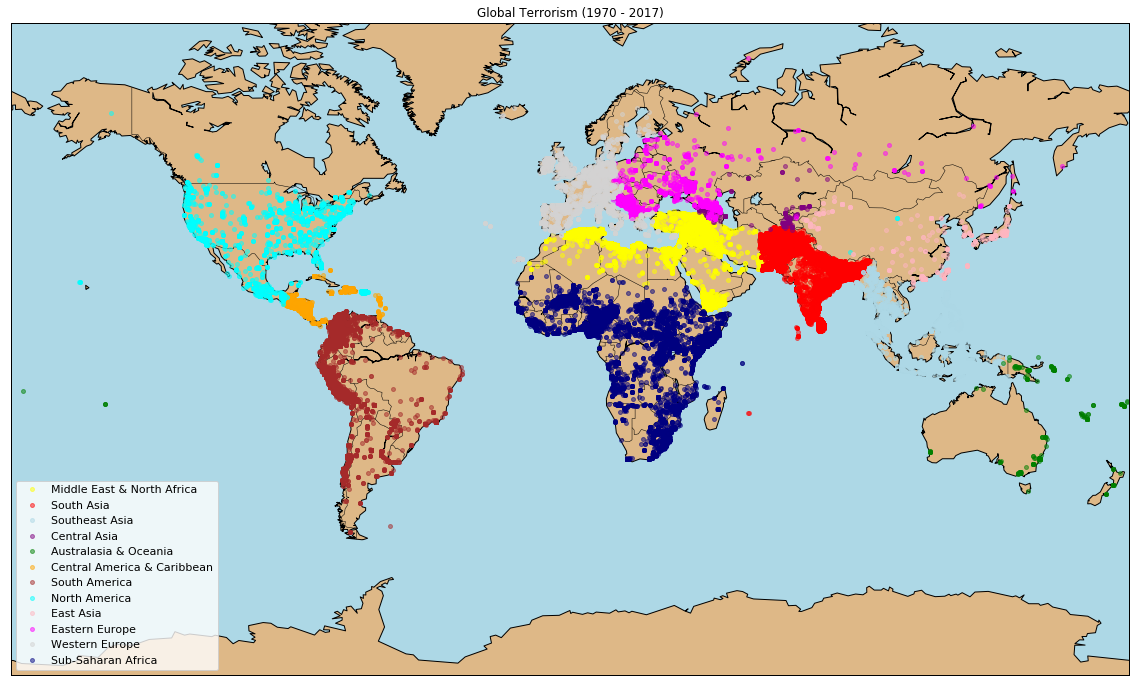

In [9]:
plt.figure(figsize=(28,12))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(df1.longitude[df1.region_txt == region].astype("float")),\
            (list(df1.latitude[df1.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2017)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()    

### we can see from the above graph below that the number of terrorist acts have increased, also the number of deaths per act hs been on the rise. This could possible be due to there being more attacks taking place in densely populated areas. 

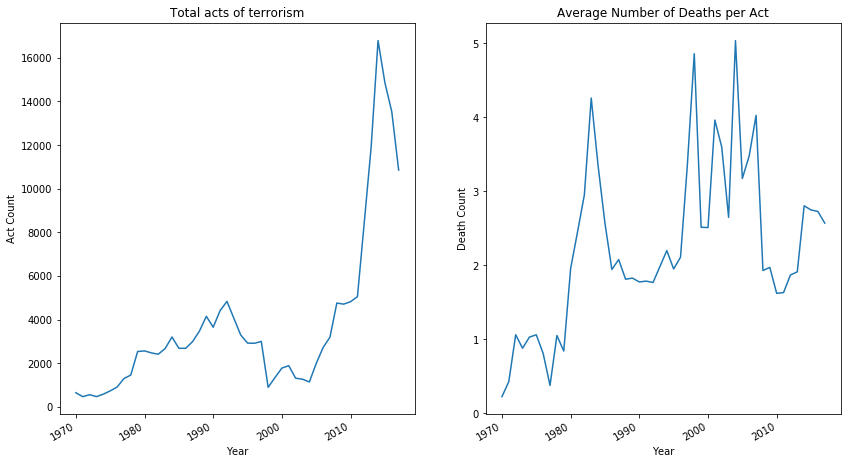

In [10]:
count_year = df1.groupby(['iyear']).count()
mean_year = df1.groupby(['iyear']).mean()

fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set(title = 'Total acts of terrorism', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Average Number of Deaths per Act', ylabel = 'Death Count', xlabel = 'Year')
ax2.plot(mean_year.index, mean_year.nkill)
fig.autofmt_xdate()

### NOTE: For every terror attack in Sub-Saharan Africa claims over 5 lives on average.

In [11]:
region_mean_kills = []
for region in regions:
    region_mean_kills.append(df1.nkill[df1.region_txt == region].mean())

print('Average number of people killed per attack by Region\n')
for i, region in enumerate(regions):
    print('{}:{}'.format(region, round(region_mean_kills[i],2)))

Average number of people killed per attack by Region

Middle East & North Africa:2.85
South Asia:2.29
Southeast Asia:1.17
Central Asia:1.67
Australasia & Oceania:0.55
Central America & Caribbean:3.38
South America:1.58
North America:1.46
East Asia:1.51
Eastern Europe:1.49
Western Europe:0.43
Sub-Saharan Africa:4.86


### We learn that Iraq is the most attacked country and  Middle East & North Africa is the most attacked region.

In [12]:
print('Country with Highest Terrorist Attacks:',df1['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df1['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df1['nkill'].max(),'that took place in',df1.loc[df1['nkill'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


### Terrorism by region
### Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australia and Ocenia region has experienced fewer terrorist attacks. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks

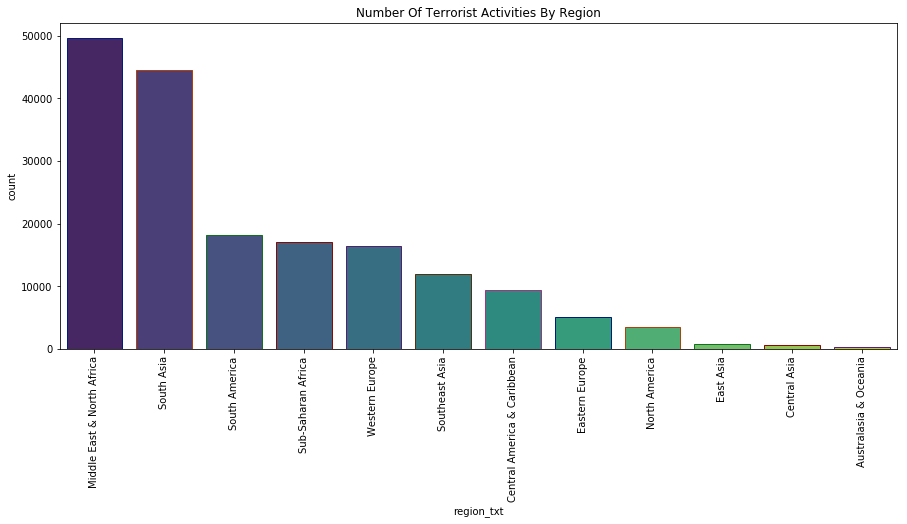

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=df1,palette='viridis',edgecolor=sns.color_palette('dark',7),order=df1['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

### Terrorist attack by countries 

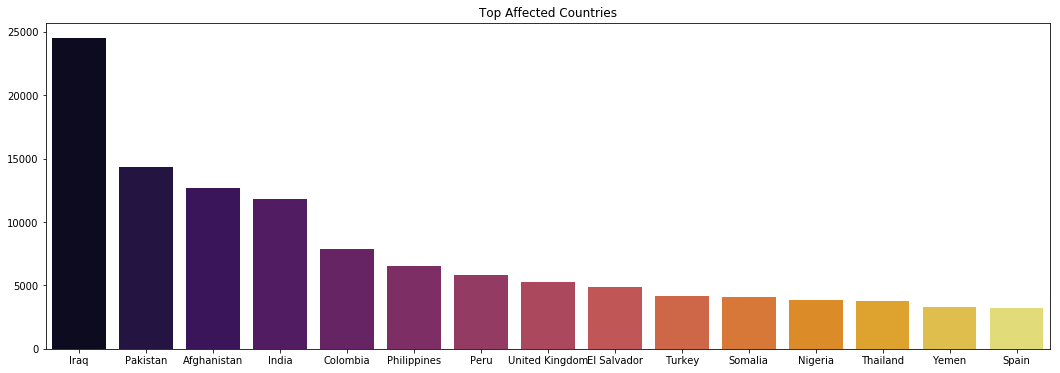

In [15]:
plt.subplots(figsize=(18,6))
sns.barplot(df1['country_txt'].value_counts()[:15].index,df1['country_txt'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()


### The number of terrorist activities have gone up sharply after turn of the century i.e. from year 2000. 

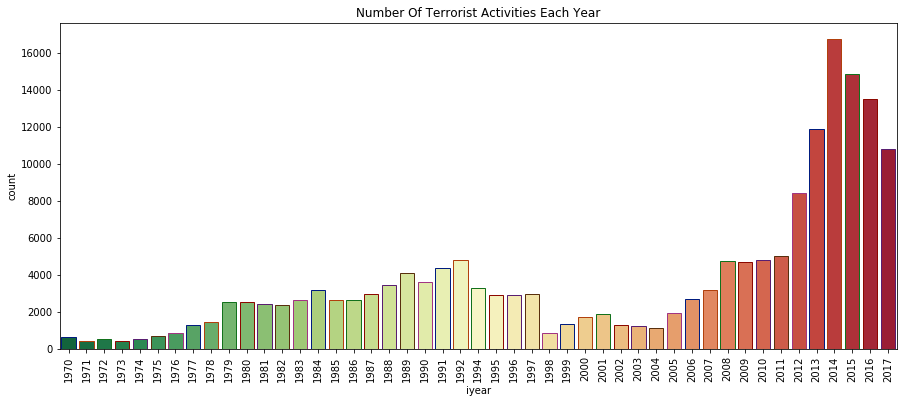

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df1,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### We note that Bombing/explosion is used in most of the attacks could be beacuse it requires least planning. On the hand Hijacking is the least common method 

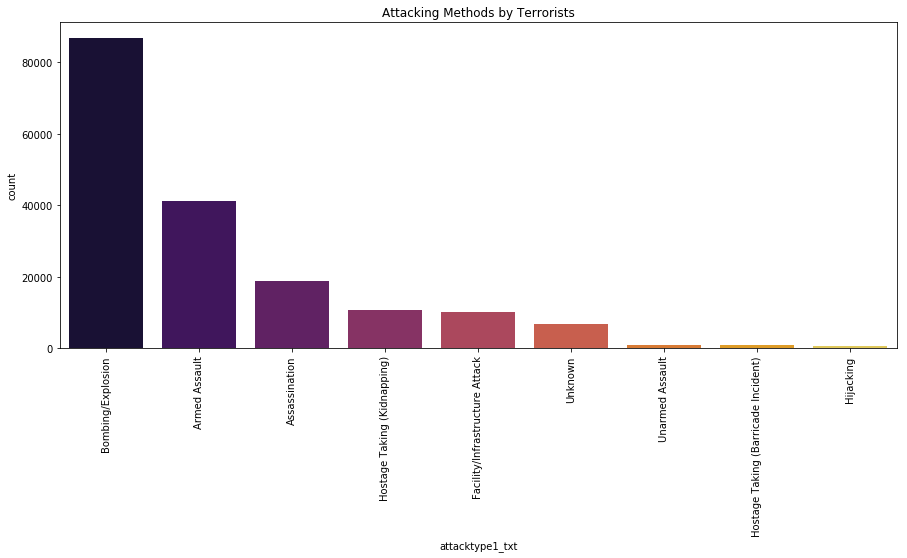

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df1,palette='inferno',order=df1['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

### Bombing and Armed assaults, as can be seen above and below are the most prominent types of Attack irrespective of Regions.

 

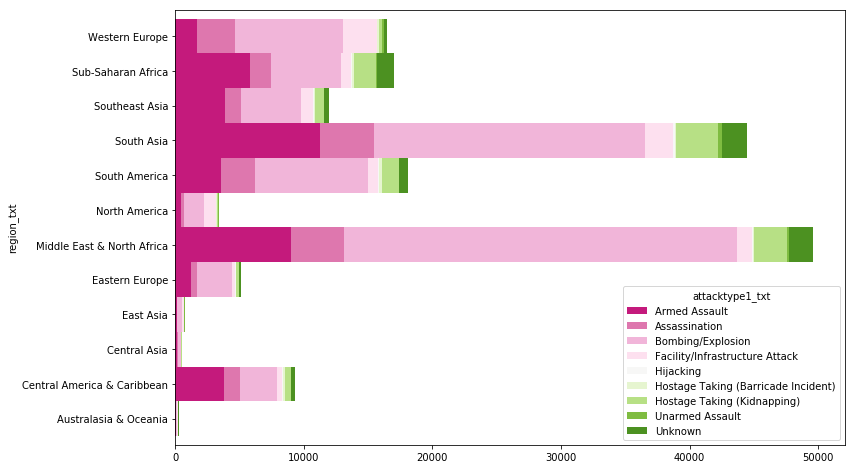

In [18]:
pd.crosstab(df1.region_txt,df1.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('PiYG',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### We note that Private propoerty, military and police are most affected by the attacks. 


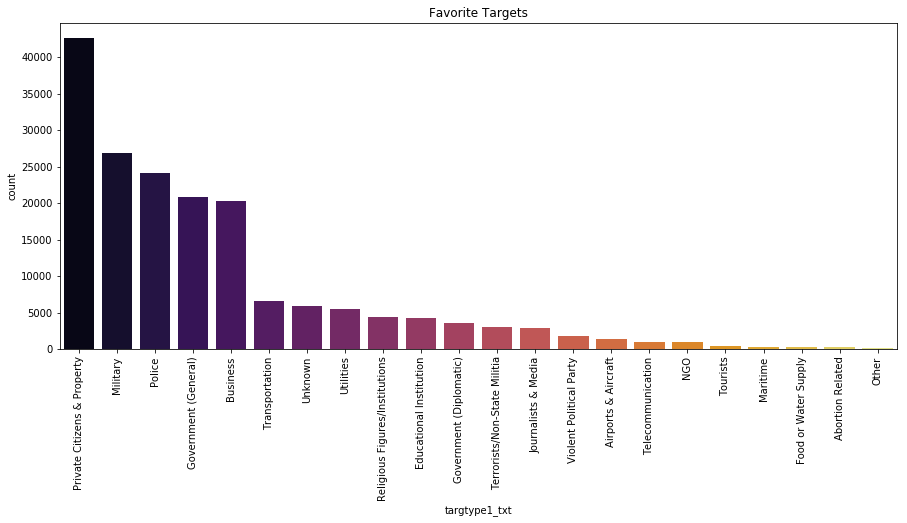

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(df1['targtype1_txt'],palette='inferno',order=df1['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

## Trend in Terrorist Activities


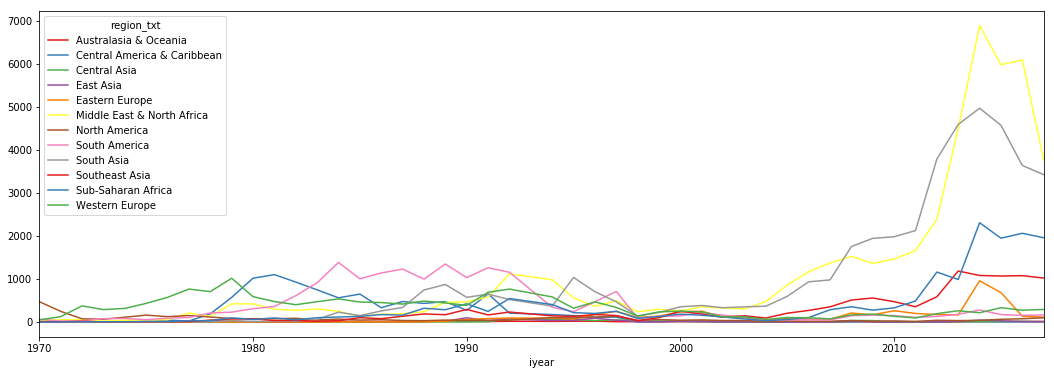

In [20]:
terror_region=pd.crosstab(df1.iyear,df1.region_txt)
terror_region.plot(color=sns.color_palette('Set1',13))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Most active groups 

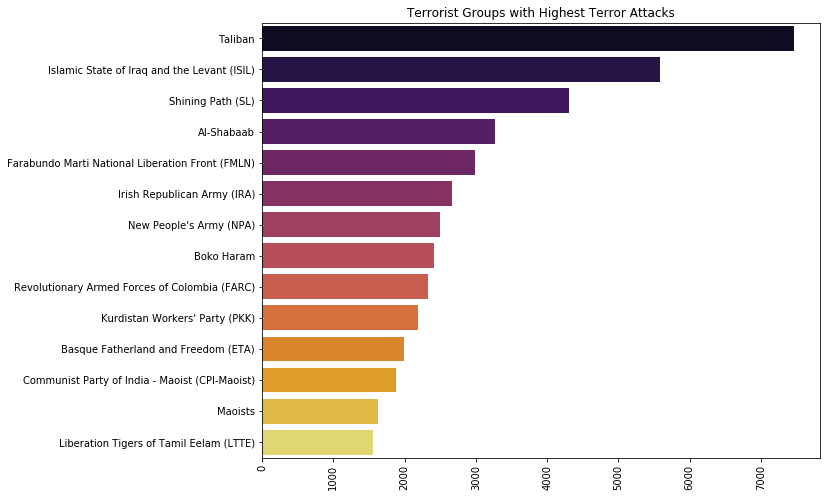

In [21]:
sns.barplot(df1['gname'].value_counts()[1:15].values,df1['gname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

## Overview about target and victim groups


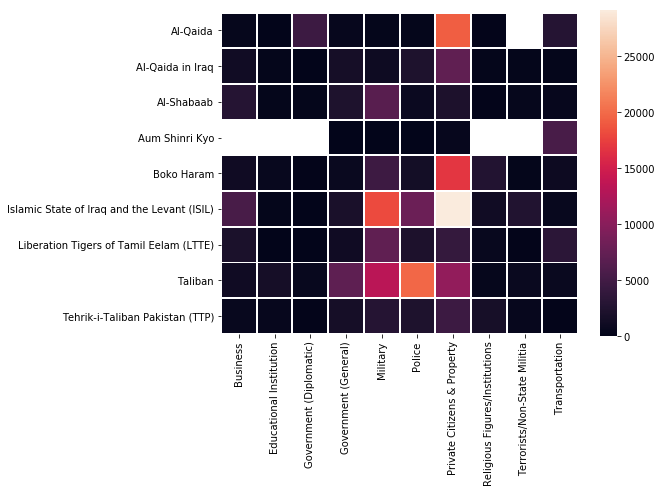

In [22]:
data = df.groupby(["gname", "targtype1_txt"])[['nkill', 'nwound']].sum()
data = data.reset_index()
data = data[data.targtype1_txt != 'Unknown']
data = data[data.gname != 'Unknown']
data = data[data.gname.isin(list(df.groupby("gname").nwound.sum().sort_values(ascending=False)[:10].index.tolist()))]
data = data[data.targtype1_txt.isin(list(df.groupby("targtype1_txt").nwound.sum().sort_values(ascending=False)[:10].index.tolist()))]


data = data.fillna(0)
data['nvictim'] = data.nkill + data.nwound
del data['nkill']
del data['nwound']
sns.heatmap(data.pivot('gname', 'targtype1_txt', 'nvictim'),square=True, linewidths=1, linecolor='white')
plt.ylabel('')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(8,6)

## Activity of Top Terrorist Groups 

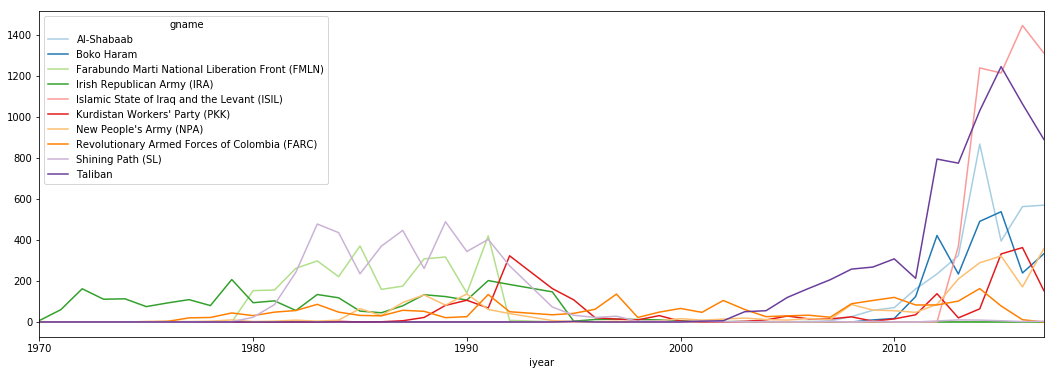

In [23]:
top_groups10=df1[df1['gname'].isin(df1['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.gname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

#### The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970. Some of the groups that have started lately in 1990's and 2000's like the Taliban and ISIL, have shown a shoot in the number of attacks in the past years.

## Regions Attacked By Terrorist Groups 

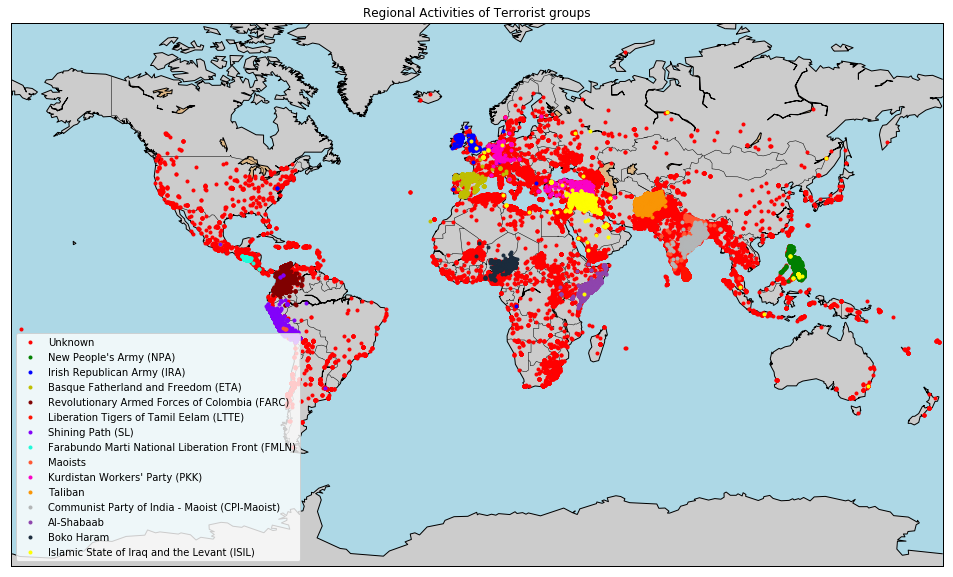

In [24]:
top_groups=df1[df1['gname'].isin(df1['gname'].value_counts()[:15].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='burlywood')
m4.drawmapboundary(fill_color='lightblue')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c','yellow']
group=list(top_groups['gname'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['gname']==group].latitude)
    long_group=list(top_groups[top_groups['gname']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist groups')
plt.show()

#### The basemap clearly shows the regions of activity by the groups. ISIL is looks to be the notorious group in Iran and Iraq or broadly Middle-East. Similarly Taliban is concentrated in Afghanistan and Pakistan.

#### The Unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groups. 

### Mapping top 10 cities targeted in India, USA, and Iraq 

In [25]:
df1_filter = df1[df1['targtype1_txt'] == "Private Citizens & Property"]
df1_filter = df1[df1['country_txt'] == "India"]
df1_filter = df1_filter[['city','latitude','longitude']]
df1_filter = df1_filter[df1_filter['city']!='Unknown' ]
data = df1_filter[['city','latitude','longitude']]
df1_filter = df1_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:10].values,
        'y': data_city['value'][0:10].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
         #   'sizeref': 'sizeref',
            'size': data_city['value'][0:10]
              }
    }
]
iplot(data)
City_State = pd.merge(data_city, df1_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[28,81], tiles="Mapbox Bright", zoom_start=4.5)
for i in range(0,10):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*300,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

In [26]:
df1_filter = df1[df1['targtype1_txt'] == "Private Citizens & Property"]
df1_filter = df1[df1['country_txt'] == "United States"]
df1_filter = df1_filter[['city','latitude','longitude']]
df1_filter = df1_filter[df1_filter['city']!='Unknown' ]
data = df1_filter[['city','latitude','longitude']]
df1_filter = df1_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:10].values,
        'y': data_city['value'][0:10].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
         #   'sizeref': 'sizeref',
            'size': data_city['value'][0:10]
              }
    }
]
iplot(data)
City_State = pd.merge(data_city, df1_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[48,-103], tiles="Mapbox Bright", zoom_start=3.8)
for i in range(0,10):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*1000,
      color='red',
      fill=True,
      fill_color='orange'
   ).add_to(m)
m

In [27]:
df1_filter = df1[df1['targtype1_txt'] == "Private Citizens & Property"]
df1_filter = df1[df1['country_txt'] == "Iraq"]
df1_filter = df1_filter[['city','latitude','longitude']]
df1_filter = df1_filter[df1_filter['city']!='Unknown' ]
data = df1_filter[['city','latitude','longitude']]
df1_filter = df1_filter.drop_duplicates(subset=None, keep='first', inplace=False)
data_city = pd.DataFrame({
    'city':data['city'].value_counts().index,
   'value':data['city'].value_counts().values
})
data = [
    {
        'x': data_city['city'][0:10].values,
        'y': data_city['value'][0:10].values,
        'mode': 'markers',
        'marker': {
            'sizemode': 'area',
         #   'sizeref': 'sizeref',
            'size': data_city['value'][0:10]
              }
    }
]
iplot(data)
City_State = pd.merge(data_city, df1_filter, how='left', left_on='city', right_on='city')
City_State = City_State.drop_duplicates(subset='city', keep='first', inplace=False)
count = City_State['value'].values
m = folium.Map(location=[35,48], tiles="Mapbox Bright", zoom_start=5.5)
for i in range(0,10):
   folium.Circle(
      location=[City_State.iloc[i]['latitude'], City_State.iloc[i]['longitude']],
      #location=[20, 81],
      popup=City_State.iloc[i]['city'],
      radius=int(count[i])*30,
      color='Blue',
      fill=True,
      fill_color='cyan'
   ).add_to(m)
m

##  Motive Behind Attacks

#### Motive simply means the reason for doing something. Now this reason may be anything, personal grudges, revolt against government, religious sentiments, etc. In this part we will try to analyse what are the main reasons behind the terrorist activities.
#### For this have used NLTK for Natural Language Processing. The reason for using NLP is because if we simply take the count of words and make a wordcloud, many useless words like 'the','and,'is', etc will have the highest count as they are very common in english language. Thus using NLTK, we can filter out these words and find other important words.

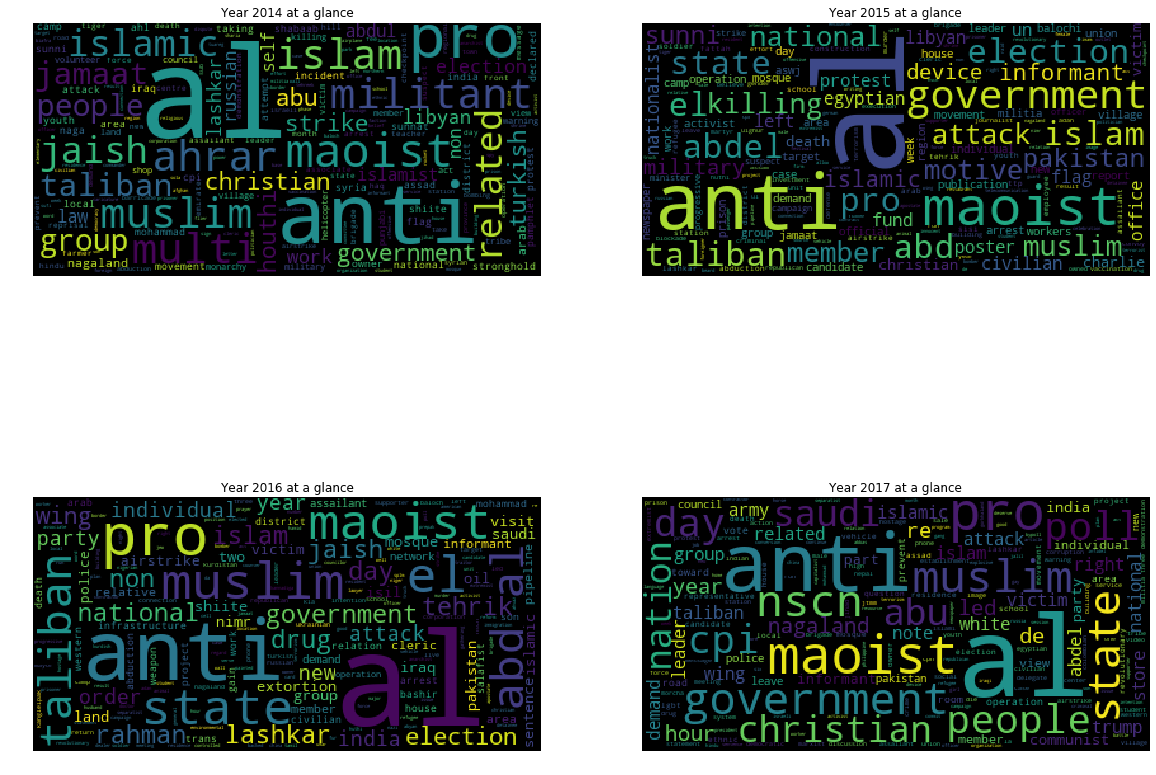

In [28]:
years = [2014,2015,2016,2017]
plt.figure(figsize=(20,16))
gs = gridspec.GridSpec(2, 2)
for i, cn in enumerate(years):
    ax = plt.subplot(gs[i])
    df_country = df[df['iyear'] == cn]
    country_motive = df_country['motive'].str.lower().str.cat(sep=' ')
    words=nltk.tokenize.word_tokenize(country_motive)
    word_dist = nltk.FreqDist(words)
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
    ax.imshow(wordcloud)
    ax.set_title('Year ' + str(cn) + ' at a glance' )
    ax.axis('off')

##  Motive Behind Attacks in US using NLTK

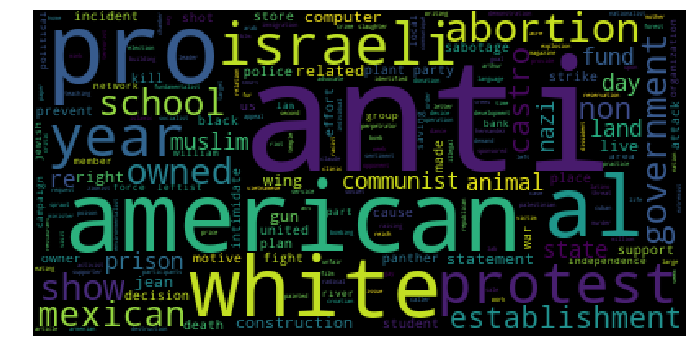

In [30]:
df_country = df1[df1['country_txt'] == 'United States']
country_motive = df_country['motive'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(country_motive)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(14,6)
plt.axis('off')
plt.show()